In [3]:
#Importing Libraries
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import r2_score
from keras.models import Sequential
from keras.layers import Dense
from keras.callbacks import EarlyStopping
from keras.optimizers import Adam
from keras.layers import LSTM
from keras.layers import Dense, Activation, Embedding, Dropout, TimeDistributed,Input

In [4]:

from google.colab import files
uploaded = files.upload()

ModuleNotFoundError: No module named 'google.colab'

In [5]:
# reading the data from data file
df = pd.read_csv('data.csv')
print(df[:5])

          Date      Open      High       Low     Close  Shares Traded  \
0  19-Jun-2018  10789.45  10789.45  10701.20  10710.45      231382790   
1  20-Jun-2018  10734.65  10781.80  10724.05  10772.05      199467082   
2  21-Jun-2018  10808.45  10809.60  10725.90  10741.10      230507383   
3  22-Jun-2018  10742.70  10837.00  10710.45  10821.85      236898415   
4  25-Jun-2018  10822.90  10831.05  10753.05  10762.45      236693278   

   Turnover (Rs. Cr)  
0           12290.16  
1           10858.35  
2           12211.18  
3           13520.01  
4           12012.41  


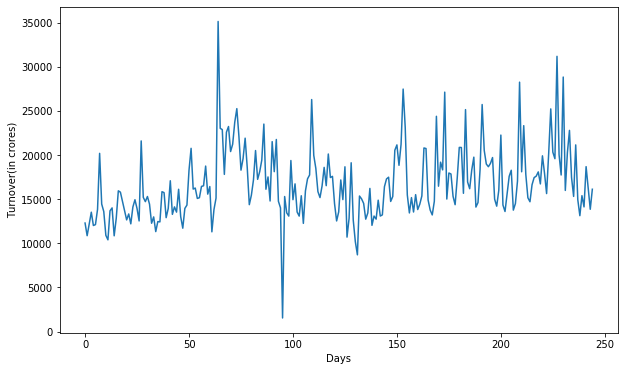

In [6]:
# plotting the turnover values
data = df.iloc[:,6].values
plt.figure(figsize=(10, 6))
plt.xlabel('Days')
plt.ylabel('Turnover(in crores)')
plt.plot(data)

In [7]:
# Divide into train and test data
df['Date'] = pd.to_datetime(df['Date'])  
mask = (df['Date'] == '2019-4-18')
print(df.loc[mask])     # index for the date 18-Apr-2019
print('--------------------------------------------')
train = data[:205]
test = data[175:]
print(train)

          Date      Open      High      Low    Close  Shares Traded  \
205 2019-04-18  11856.15  11856.15  11738.5  11752.8      339653709   

     Turnover (Rs. Cr)  
205           18271.27  
--------------------------------------------
[12290.16 10858.35 12211.18 13520.01 12012.41 12113.53 13837.03 20187.98
 14440.17 13591.3  10896.89 10388.69 13676.58 14006.48 10843.92 12834.85
 15944.45 15787.28 14744.56 13709.57 12649.4  13320.2  12199.98 14105.94
 14932.51 13931.15 12528.8  21595.33 15203.09 14716.66 15297.4  14436.12
 12267.66 12984.66 11321.55 12457.71 12422.62 15842.76 15738.26 12899.22
 13935.35 17081.62 13275.31 14119.93 13528.83 16117.77 13019.55 11707.5
 13946.7  14324.65 18275.54 20755.73 16139.58 16254.78 15078.23 15161.
 16441.02 16513.89 18745.54 15567.9  16423.36 11294.84 13814.11 15116.69
 35131.19 23023.34 22878.57 17803.68 22582.86 23227.86 20391.72 21225.59
 23711.57 25254.21 22130.94 18285.41 19592.59 21907.13 18606.04 14372.15
 15453.03 17173.14 20505.66 17241.9

In [8]:
# Normalize the train and test data using min-max scaler
sc = MinMaxScaler(feature_range = (0, 1))
train = sc.fit_transform(train.reshape(-1,1))
test = sc.transform(test.reshape(-1,1))

In [9]:
#Create X_train using 30 timesteps for each sample
X_train = []
y_train = []
for i in range(30, train.shape[0]):
    X_train.append(train[i-30:i, 0])
    y_train.append(train[i, 0])
X_train, y_train = np.array(X_train), np.array(y_train)

In [10]:
# Training LSTM model

X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))
lstm_model = Sequential()
lstm_model.add(LSTM(8, input_shape=(X_train.shape[1], 1), activation='relu',kernel_initializer='lecun_uniform'))
lstm_model.add(Dense(1))
lstm_model.compile(optimizer = 'adam', loss = 'mean_squared_error')

lstm_model.fit(X_train, y_train, epochs = 45, batch_size = 4)

RuntimeError: It looks like you are trying to use a version of multi-backend Keras that does not support TensorFlow 2.0. We recommend using `tf.keras`, or alternatively, downgrading to TensorFlow 1.14.

In [11]:
# Create X_test using 30 timesteps for each sample
X_test = []
y_test = []

for i in range(30, test.shape[0]):
    X_test.append(test[i-30:i, 0])
    y_test.append(test[i, 0])
X_test, y_test = np.array(X_test), np.array(y_test)
print(X_test.shape)
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))
print(X_train.shape)

(40, 30)
(175, 30, 1)


In [12]:
# plot predictions vs real turnover on training set
predicted = lstm_model.predict(X_train)
predicted = sc.inverse_transform(predicted)
plt.plot(sc.inverse_transform(train[-175:]), color = 'red', label = 'Turnover')
plt.plot(predicted, color = 'green', label = 'Predicted Turnover')
plt.title('NIFTY50 Turnover')
plt.xlabel('Time')
plt.ylabel('Turnover')
plt.legend()
plt.show()

NameError: name 'lstm_model' is not defined

In [0]:
# plotting predictions vs true turnover for the test set
predicted = lstm_model.predict(X_test)
predicted = sc.inverse_transform(predicted)
plt.plot(sc.inverse_transform(test[-41:]), color = 'red', label = 'Turnover')
plt.plot(predicted, color = 'green', label = 'Predicted Turnover')
plt.title('NIFTY50 Turnover')
plt.xlabel('Time')
plt.ylabel('Turnover')
plt.legend()
plt.show()